# How does Charizard’s weight compare to the weights of other first generation Pokémon?


This study is an observational study because it analyzes existing data on Pokémon weights without changing anything. It compares Charizard’s weight to the weights of other first generation Pokemon. However, there are some possible biases to consider. First, selection bias could happen if the dataset does not include all Pokemon or if some weights are missing, which would affect how accurate the comparison is. Second, measurement bias might occur if the weights are not measured consistently or are inaccurate, leading to unreliable results. Lastly, because Charizard is much larger than many other Pokemon, its weight could be an outlier that affects the average weight and spreads the data unevenly. These biases should be kept in mind when interpreting the results.



Q1 (25th percentile): 9.00 kg
Q3 (75th percentile): 64.80 kg
IQR (Interquartile Range): 55.80 kg
Standard Deviation: 109.35 kg
Lower bound for outliers: -74.70 kg
Upper bound for outliers: 148.50 kg
Outliers:
105    253.8
208    220.0
312    330.0
322    187.0
344    256.5
       ...  
793    195.0
796    205.0
797    175.0
798    230.0
799    202.5
Name: weight_kg, Length: 80, dtype: float64


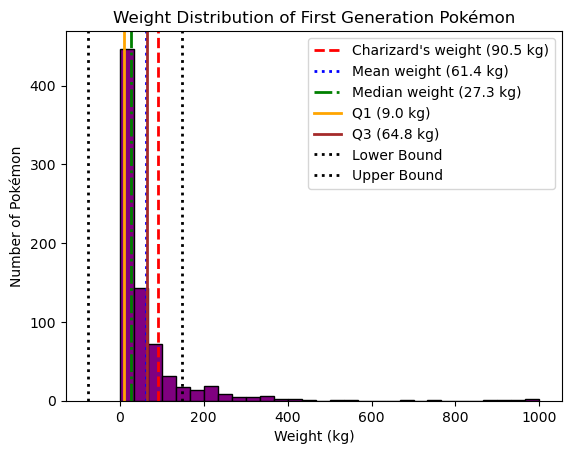


Conclusion:
Charizard's weight is 90.5 kg, which is above the median weight of 27.3 kg and mean weight of 61.4 kg for first generation Pokémon.
The interquartile range (IQR) of weights is 55.80 kg, with lower and upper bounds for outliers at -74.70 kg and 148.50 kg, respectively.
The standard deviation of the weights is 109.35 kg.
Charizard's weight is not an outlier and falls within the normal weight range of first generation Pokémon.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('pokemon.csv')

# Find Charizard's weight
charizard_weight = data.loc[data['name'] == 'Charizard', 'weight_kg'].values[0]

# Calculate mean, median, Q1, Q3, IQR, and standard deviation weights of all Pokémon
weights = data['weight_kg']
mean_weight = weights.mean()
median_weight = weights.median()
q1 = weights.quantile(0.25)  # First quartile (25th percentile)
q3 = weights.quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1                # Interquartile range
std_dev = weights.std()      # Standard deviation

# Calculate outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = weights[(weights < lower_bound) | (weights > upper_bound)]

print(f"Q1 (25th percentile): {q1:.2f} kg")
print(f"Q3 (75th percentile): {q3:.2f} kg")
print(f"IQR (Interquartile Range): {iqr:.2f} kg")
print(f"Standard Deviation: {std_dev:.2f} kg")
print(f"Lower bound for outliers: {lower_bound:.2f} kg")
print(f"Upper bound for outliers: {upper_bound:.2f} kg")
print(f"Outliers:\n{outliers}")

# Plot histogram of weights
plt.hist(weights, bins=30, color='purple', edgecolor='black')
plt.axvline(charizard_weight, color='red', linestyle='dashed', linewidth=2, label=f"Charizard's weight ({charizard_weight} kg)")
plt.axvline(mean_weight, color='blue', linestyle='dotted', linewidth=2, label=f"Mean weight ({mean_weight:.1f} kg)")
plt.axvline(median_weight, color='green', linestyle='dashdot', linewidth=2, label=f"Median weight ({median_weight:.1f} kg)")
plt.axvline(q1, color='orange', linestyle='solid', linewidth=2, label=f"Q1 ({q1:.1f} kg)")
plt.axvline(q3, color='brown', linestyle='solid', linewidth=2, label=f"Q3 ({q3:.1f} kg)")
plt.axvline(lower_bound, color='black', linestyle='dotted', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='black', linestyle='dotted', linewidth=2, label='Upper Bound')
plt.title('Weight Distribution of First Generation Pokémon')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Pokémon')
plt.legend()
plt.show()

# Print Conclusion
print("\nConclusion:")
print(f"Charizard's weight is {charizard_weight} kg, which is above the median weight of {median_weight:.1f} kg and mean weight of {mean_weight:.1f} kg for first generation Pokémon.")
print(f"The interquartile range (IQR) of weights is {iqr:.2f} kg, with lower and upper bounds for outliers at {lower_bound:.2f} kg and {upper_bound:.2f} kg, respectively.")
print(f"The standard deviation of the weights is {std_dev:.2f} kg.")
if charizard_weight > upper_bound:
    print("Charizard's weight is considered an outlier, meaning it is much heavier than most first generation Pokémon.")
else:
    print("Charizard's weight is not an outlier and falls within the normal weight range of first generation Pokémon.")
